In [1]:
library('tidyverse')
library("ggrepel")

df_nba = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-raptor/historical_RAPTOR_by_player.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  player_name = col_character(),
  player_id = col_character(),
  season = col_double(),
  poss = col_double(),
  mp = col_double(),
  raptor_offense = col_double(),
  raptor_defense = col_double(),
  raptor_total = col_double(),
  war_total = col_double(),
  war_reg_season = col_double(),
  war_playoffs = col_double(),
  predator_offense = col_double(),
  predator_defense = col_double(),
  predator_total = col_double(),
  pace_impact = col_double()
)




In [3]:
df_nba %>% print

# A tibble: 17,483 x 15
   player_name player_id season  poss    mp raptor_offense raptor_defense
   <chr>       <chr>      <dbl> <dbl> <dbl>          <dbl>          <dbl>
 1 Alaa Abdel… abdelal01   1991   640   303          -3.94         -0.510
 2 Alaa Abdel… abdelal01   1992  1998   959          -2.55         -0.198
 3 Alaa Abdel… abdelal01   1993  2754  1379          -2.37         -2.07 
 4 Alaa Abdel… abdelal01   1994   320   159          -6.14         -2.75 
 5 Alaa Abdel… abdelal01   1995   984   506          -3.85         -1.27 
 6 Kareem Abd… abdulka01   1977  7674  3483           4.54          3.10 
 7 Kareem Abd… abdulka01   1978  5343  2399           3.45          3.42 
 8 Kareem Abd… abdulka01   1979  7826  3524           2.95          2.53 
 9 Kareem Abd… abdulka01   1980  8226  3761           3.12          2.43 
10 Kareem Abd… abdulka01   1981  6716  3110           2.37          1.80 
# … with 17,473 more rows, and 8 more variables: raptor_total <dbl>,
#   war_total <dbl>

In [2]:
df_season = df_nba %>% 
        filter(season %in% c(2017, 2018, 2019)) %>%
        group_by(season) %>%
        filter(raptor_offense > mean(raptor_offense) & raptor_offense < 15 & raptor_defense > -10 & raptor_defense < 15)


df_season %>% print

# A tibble: 844 x 15
# Groups:   season [3]
   player_name player_id season  poss    mp raptor_offense raptor_defense
   <chr>       <chr>      <dbl> <dbl> <dbl>          <dbl>          <dbl>
 1 Alex Abrin… abrinal01   2017  2387  1135         0.543          -1.14 
 2 Alex Abrin… abrinal01   2018  2546  1244        -0.0208         -1.50 
 3 Quincy Acy  acyqu01     2017  1169   558        -0.344           0.576
 4 Steven Ada… adamsst01   2018  5530  2687         1.47            1.14 
 5 Steven Ada… adamsst01   2019  6164  2828        -0.0718          1.88 
 6 LaMarcus A… aldrila01   2018  5298  2686         2.60            1.37 
 7 LaMarcus A… aldrila01   2019  5983  2931         0.649           1.41 
 8 Kadeem All… allenka01   2019   870   416         2.08           -1.02 
 9 Lavoy Allen allenla01   2017  1806   882        -0.708          -0.571
10 Tony Allen  allento01   2017  3722  1914        -0.714           2.22 
# … with 834 more rows, and 8 more variables: raptor_total <dbl>,
# 

In [3]:
df_kyrie = df_nba %>% filter(player_name == "Kyrie Irving") %>% 
                    filter(season %in% c(2017, 2018, 2019))

df_kyrie %>% print

# A tibble: 3 x 15
  player_name player_id season  poss    mp raptor_offense raptor_defense
  <chr>       <chr>      <dbl> <dbl> <dbl>          <dbl>          <dbl>
1 Kyrie Irvi… irvinky01   2017  6452  3178           6.09         -3.51 
2 Kyrie Irvi… irvinky01   2018  3951  1931           5.98         -1.16 
3 Kyrie Irvi… irvinky01   2019  5404  2544           5.08          0.609
# … with 8 more variables: raptor_total <dbl>, war_total <dbl>,
#   war_reg_season <dbl>, war_playoffs <dbl>, predator_offense <dbl>,
#   predator_defense <dbl>, predator_total <dbl>, pace_impact <dbl>


In [4]:
df_pointgaurds = df_nba %>%
                filter(season %in% c(2017, 2018, 2019)) %>%
                filter(player_name %in% c("Stephen Curry", "Russell Westbrook", "Chris Paul", "Damian Lillard", "Kyle Lowry", "John Wall", "Kemba Walker", "Jamal Murray", "Ben Simmons", "Ricky Rubio", "Mike Conley", "Rajon Rondo", "D'Angelo Russell", "Patrick Beverley"))
df_pointgaurds %>% print

# A tibble: 41 x 15
   player_name player_id season  poss    mp raptor_offense raptor_defense
   <chr>       <chr>      <dbl> <dbl> <dbl>          <dbl>          <dbl>
 1 Patrick Be… beverpa01   2017  4979  2383          1.27          2.31  
 2 Patrick Be… beverpa01   2018   668   334          0.865         2.20  
 3 Patrick Be… beverpa01   2019  4998  2332          1.15          1.37  
 4 Mike Conley conlemi01   2017  4893  2516          5.51          0.705 
 5 Mike Conley conlemi01   2018   744   373          1.34          2.07  
 6 Mike Conley conlemi01   2019  4787  2342          4.61          1.70  
 7 Stephen Cu… curryst01   2017  6963  3239          9.31         -0.0959
 8 Stephen Cu… curryst01   2018  4708  2186          8.06         -0.500 
 9 Stephen Cu… curryst01   2019  6820  3177          7.51          0.277 
10 Damian Lil… lillada01   2017  5844  2845          5.75         -2.38  
# … with 31 more rows, and 8 more variables: raptor_total <dbl>,
#   war_total <dbl>, war_re

In [5]:

df_average_o = df_nba %>% filter(season %in% c(2017, 2018, 2019)) %>%
           group_by(season) %>%
           summarize(mean_raptor_o = mean(raptor_offense))

df_average_d = df_nba %>% filter(season %in% c(2017, 2018, 2019)) %>%
           group_by(season) %>%
           summarize(mean_raptor_d = mean(raptor_defense))

df_average_o
df_average_d

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



season,mean_raptor_o
<dbl>,<dbl>
2017,-1.213827
2018,-1.344215
2019,-1.411074


season,mean_raptor_d
<dbl>,<dbl>
2017,-0.32775764
2018,-0.24292008
2019,0.02697384


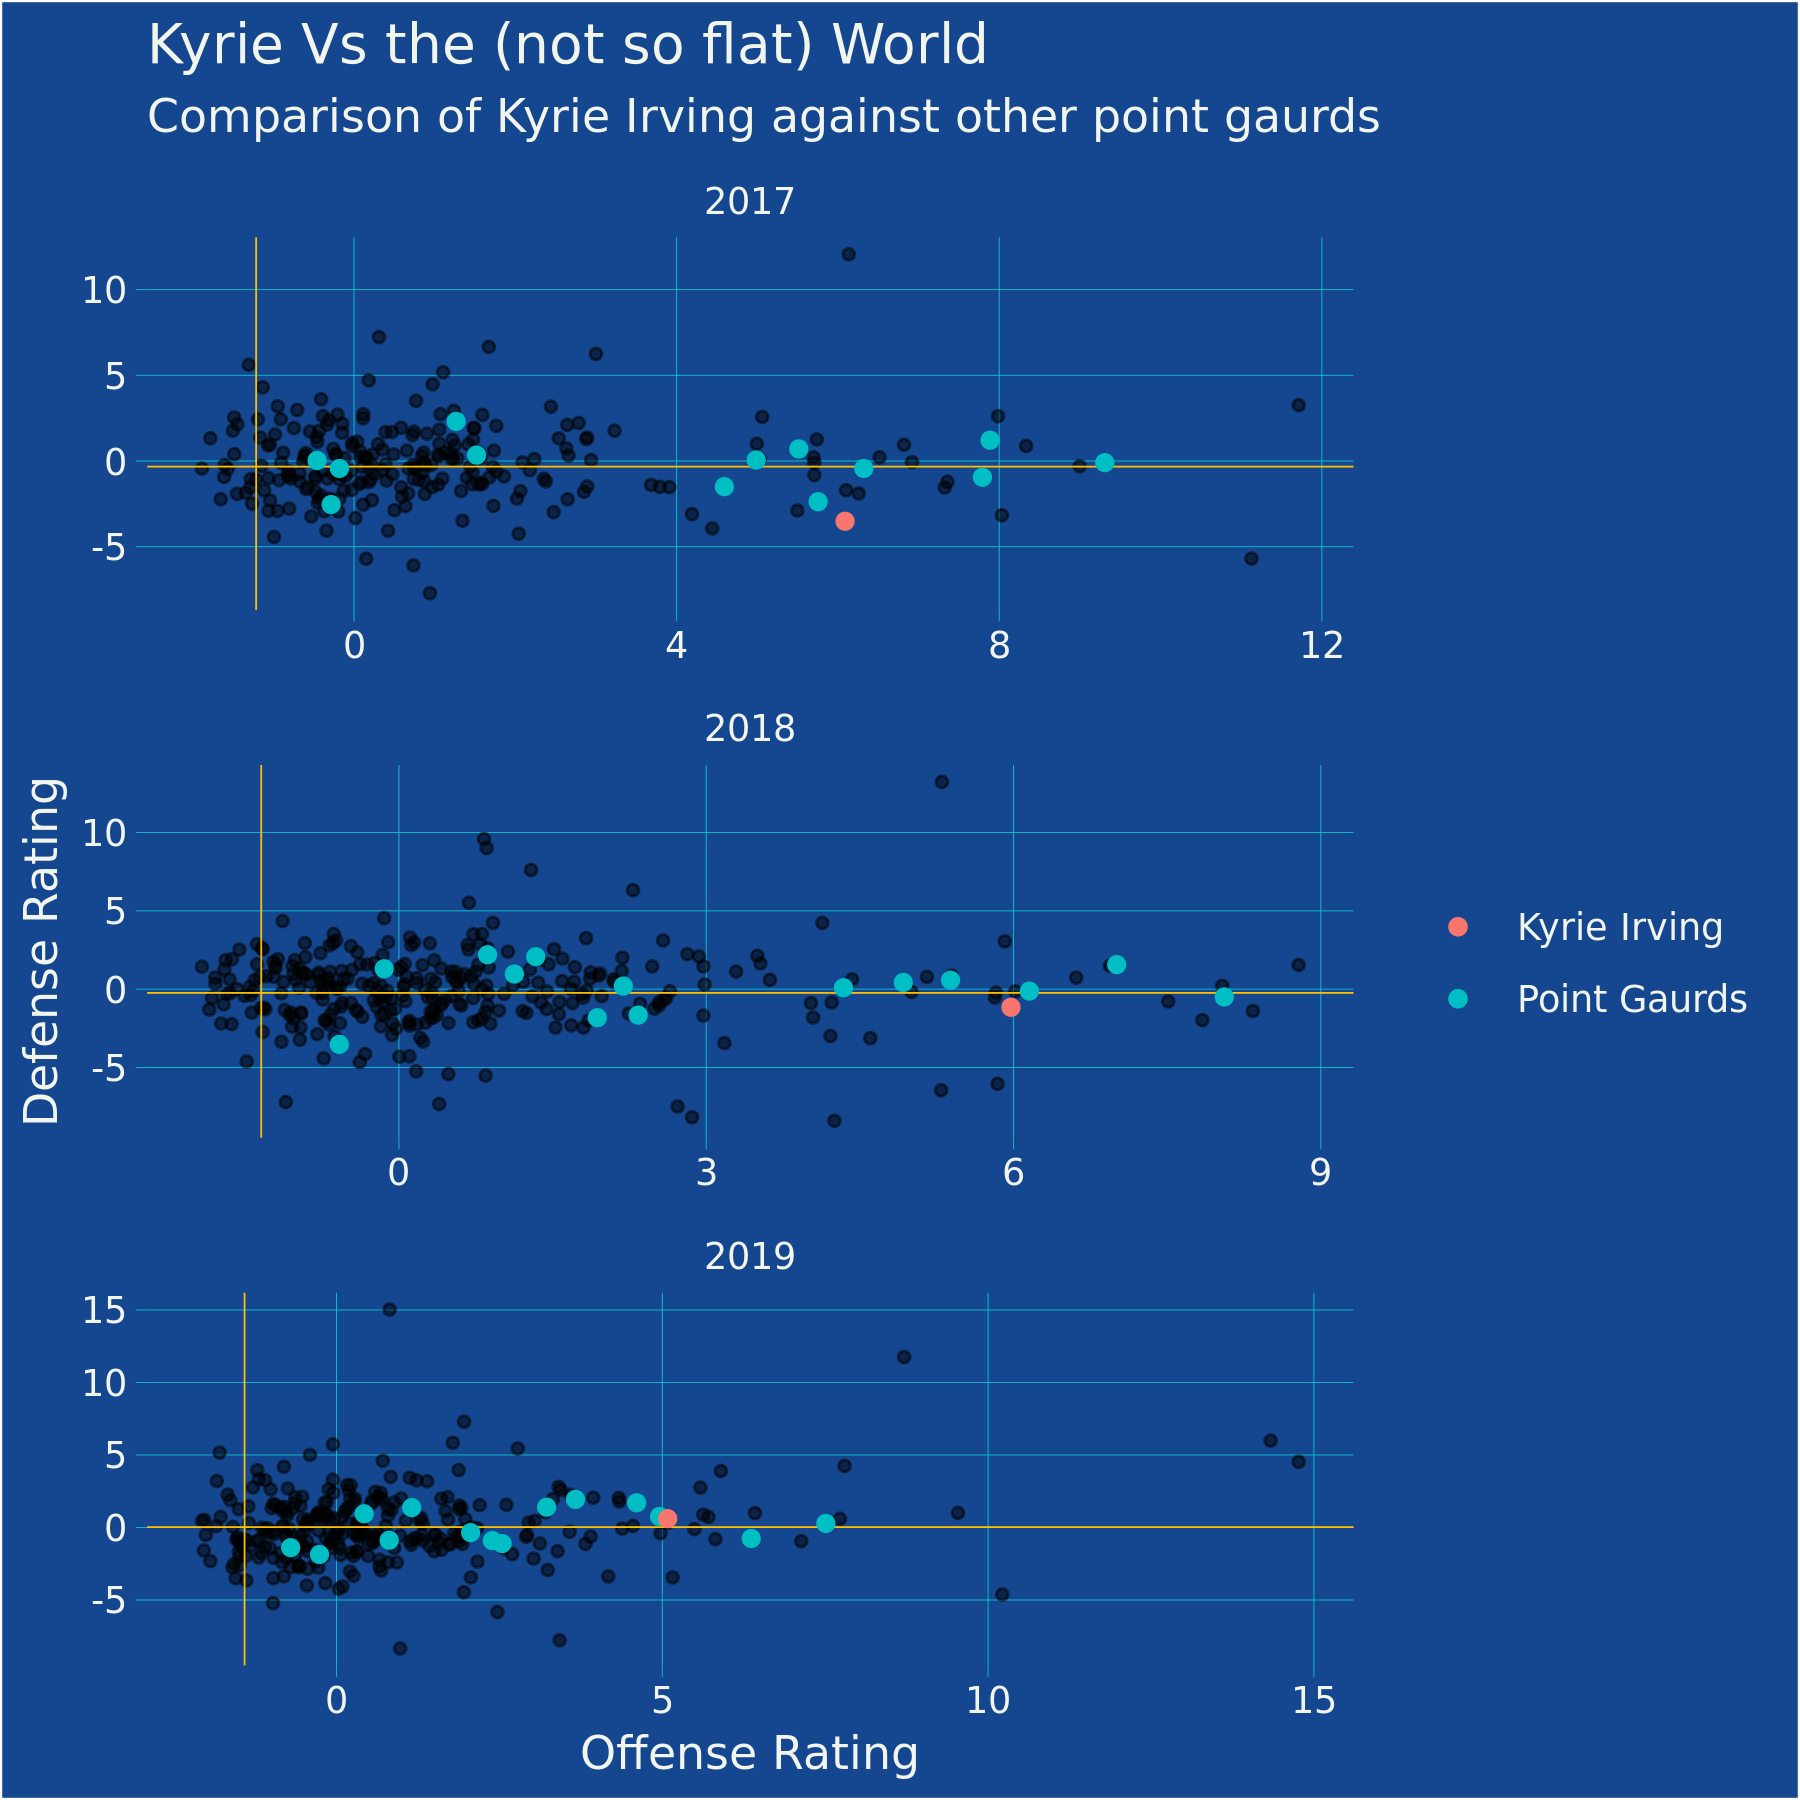

In [15]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# Main Data-set of all players around "Average"

p = ggplot(df_season, aes(x=raptor_offense, y=raptor_defense), color = 'grey50')

p = p + geom_point(position = position_jitter(h=0.7, w=0.8), alpha = 0.5, size = 1)


# These lines set the Average lines in both offense and defense ratings

p = p + geom_vline(data=df_average_o, mapping=aes(xintercept = mean_raptor_o), color = '#FFBF00', size=0.2)

p = p + geom_hline(data=df_average_d, mapping=aes(yintercept = mean_raptor_d), color = '#FFBF00', size=0.2)

# Puts kyrie irving point within the data and places name on it


# p = p + geom_text_repel(
#         segment.color = 'transparent',
#         nudge_x = 1,
#         nudge_y = -5,
#         data=df_kyrie,
#         aes(label = player_name),
#         color = '#FF6361'
# )

# Puts other point gaurds points Stephen Curry, Russell Westbrook, Chris Paul,
# Damian Lillard, Kyle Lowry, John Wall, Kemba Walker, Jamal Murray, Ben Simmons, 
# Ricky Rubio, Mike Conley, Rajon Rondo, D'Angelo Russell, Patrick Beverley
# Mixture of top point gaurds 2018-2019 season

p = p + geom_point(data=df_pointgaurds, mapping = aes(color = 'Point Gaurds'))

# p = p + geom_point(data=df_pointgaurds, color = '#7CDFF0')


# Puts kyrie irving point within the data and places name on it

p = p + geom_point(data=df_kyrie, mapping=aes(color = player_name))

# p = p + geom_point(data=df_kyrie, color = '#FF6361')

# Seperates data by seasons

p = p + facet_wrap(~season, scales = 'free', ncol = 1)

# Axis, title and legend elements adjusted here

p = p + theme(title = element_text(color = '#F1F5EC'),
              legend.background = element_rect(fill = 'transparent'),
              legend.title = element_blank(),
              legend.key = element_rect(fill = 'transparent'),
              legend.text = element_text(color = '#F1F5EC'),
              axis.text = element_text(color = '#F1F5EC'),
              strip.text = element_text(color = '#F1F5EC'),
              plot.background = element_rect(fill = '#14478F'),
              panel.background = element_rect(fill = 'transparent'),
              strip.background = element_rect(fill = 'transparent'),
              panel.grid.major = element_line(color = '#0EC5CF', size = 0.1),
              panel.grid.minor = element_blank(),
              axis.ticks = element_line(color = '#0EC5CF', size = 0.1)
              )


p = p + labs(x = "Offense Rating",
             y = "Defense Rating",
            title = "Kyrie Vs the (not so flat) World",
            subtitle = "Comparison of Kyrie Irving against other point gaurds")

p
# 14478F
# 0EC5CF
# 7CDFF0
# FF6361
# FFBF00
# F1F5EC


My data set comes from fivethirtyeight and looks at player performances through the years in non- traditional stats. The data looks at offensive ratings and defensive ratings per 100 possessions, as well as wins above replacement and even a predictive offensive and defense rating. The data also goes back to the 1976-1977 season and goes all the way through till the 2018-2019 season. I choose this data because my favorite player is Kyrie Irving so I wanted to make a model represent stats around him. Because it is a large data set I decided to look at the three most recent seasons they had 2016-2017, 2017-2018 and 2018-2019.

In my visualization I compare Kyrie to other point guards like Steph Curry, Russell Westbrook, Damian Lillard and others who were considered top point guards in the 2018-2019 season. I look at individual players offensive and defensive rating. I also add two lines depicting the mean for both offense and defense ratings through the three seasons.  

Looking at my visualization it seems that most point guards stay right around the average defense ratings and go past the offensive rating. When we look at Kyrie compared to other point guards he defensively he is average to other point guard’s ratings except for the 2016-2017 season where he was the worst defensive point guard. Offensively Kyrie tends to be on the higher end each season being top five of point guard’s offensive rating each season. Looking through the seasons Kyrie Irving has gone in 2017 from 5th highest offensive rating to 2019 being the 3rd highest offensive rating for point guards.
